In [16]:
import pandas as pd
from scipy import signal
import numpy as np
from matplotlib import pyplot as plt
import sklearn.decomposition
from sklearn.cluster import KMeans
plt.rcParams["figure.figsize"] = (20,8)

In [3]:
Data = np.loadtxt("Data.txt", dtype=float)
electrode1 = Data[:,0]
electrode2 = Data[:,1]
electrode1

array([ 2.1283e-05,  7.3701e-06, -9.3684e-06, ..., -6.6963e-07,
       -6.8155e-06, -9.6991e-06])

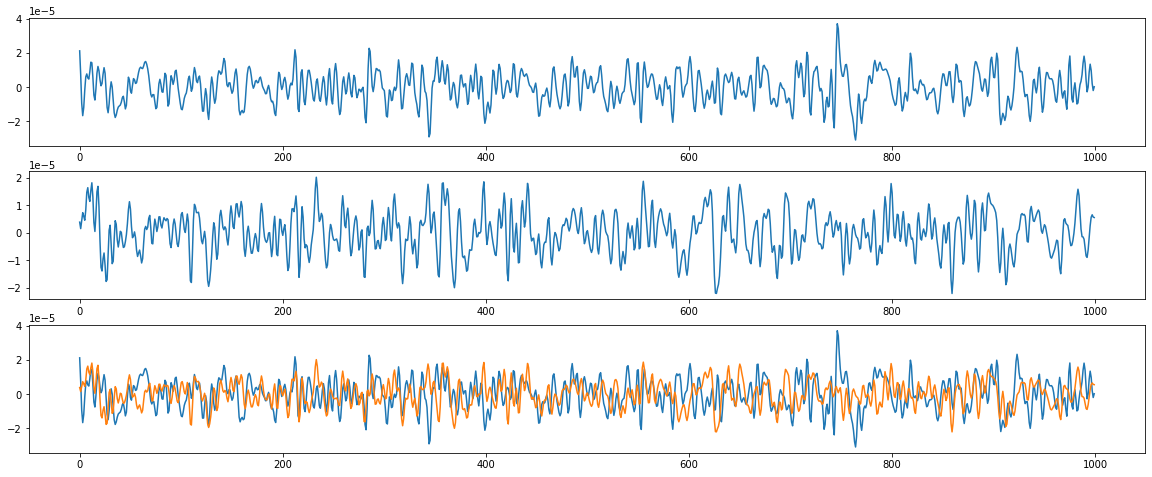

In [17]:
plt.subplot(311)
plt.plot(electrode1[:1000])
plt.subplot(312)
plt.plot(electrode2[:1000])
plt.subplot(313)
plt.plot(electrode1[:1000])
plt.plot(electrode2[:1000])

In [5]:
def spikeSorting(data, threshold, clusters):
    aboveThreshold = np.copy(data)
    aboveThreshold[aboveThreshold < threshold] = 0
    # plt.plot(aboveThreshold[:10000])
    detectedPeaks = []
    i=0
    window = 24414*2//1000
    while i <len(aboveThreshold):
        if aboveThreshold[i] == 0:
            i+=1
            continue
        peak = aboveThreshold[i]
        peakIndex = i
        while i<len(aboveThreshold) and aboveThreshold[i]!=0:
            if(aboveThreshold[i]>peak):
                peak = aboveThreshold[i]
                peakIndex = i
            i+=1
        detectedPeaks.append(peakIndex)
        i+=1
    detectedSpikes = []
    for peak in detectedPeaks:
        detectedSpikes.append(data[peak-int(window/2):peak+int(window/2)])
    pca = sklearn.decomposition.PCA(2)
    result = pca.fit_transform(detectedSpikes)
    # print(result)
    # for point in result:
    #     plt.scatter(x=point[0],y=point[1])
    kmeans = KMeans(n_clusters=clusters, random_state=0).fit(result)
    plt.rcParams["figure.figsize"] = (10,8)
    for i in range(len(result)):
        if kmeans.labels_[i]==0:
            plt.scatter(x=result[i][0], y=result[i][1], color='r')
        if kmeans.labels_[i]==1:
            plt.scatter(x=result[i][0], y=result[i][1], color='g')
        if kmeans.labels_[i]==2:
           plt.scatter(x=result[i][0], y=result[i][1], color='b')
    return detectedPeaks, kmeans.labels_

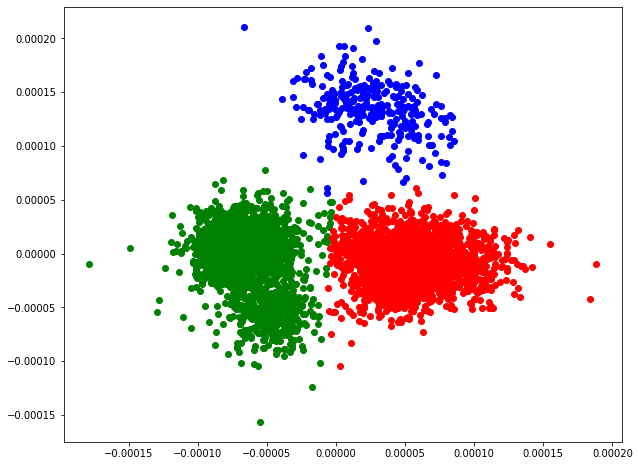

In [6]:
thresh3_5 = 3.5 * np.std(electrode1[:500])
thresh5 = 5 * np.std(electrode1[:500])
elec1_3_5 = spikeSorting(electrode1,thresh3_5, 3)
plt.savefig("FeatureSpace_1_3_5.jpg")

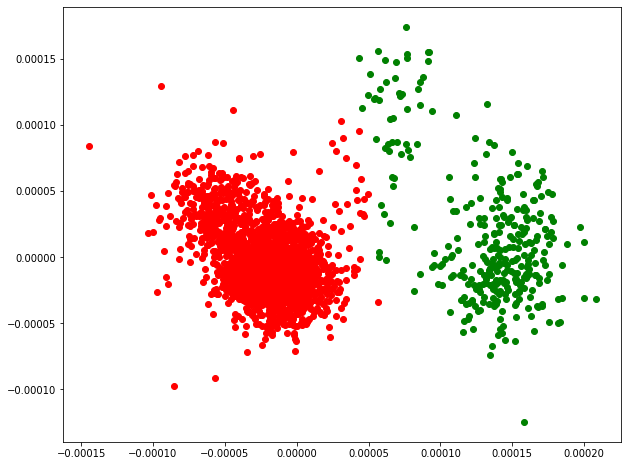

In [7]:
elec1_5 = spikeSorting(electrode1,thresh5, 2)
plt.savefig("FeatureSpace_1_5.jpg")

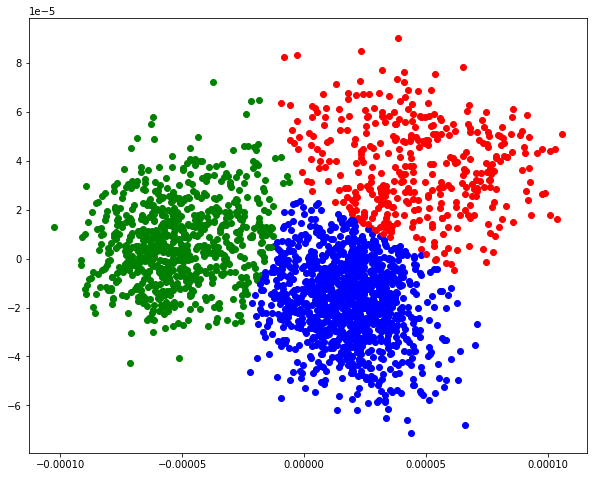

In [8]:
thresh3_52 = 3.5 * np.std(electrode2[:500])
thresh52 = 5 * np.std(electrode2[:500])
elec2_3_5 = spikeSorting(electrode2,thresh3_52, 3)
plt.savefig("FeatureSpace_2_3_5.jpg")

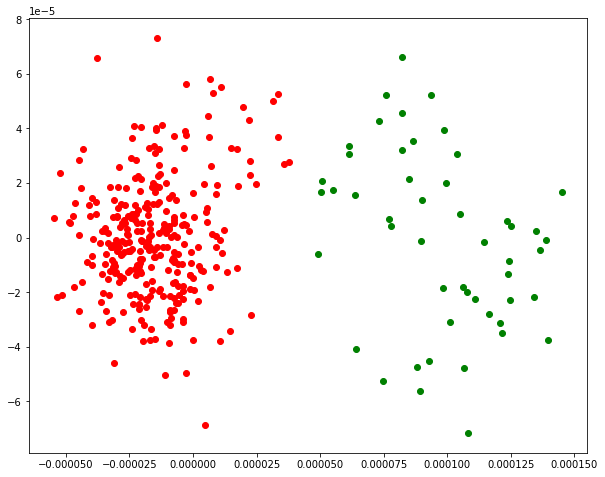

In [9]:
elec2_5 = spikeSorting(electrode2,thresh52, 2)
plt.savefig("FeatureSpace_2_5.jpg")

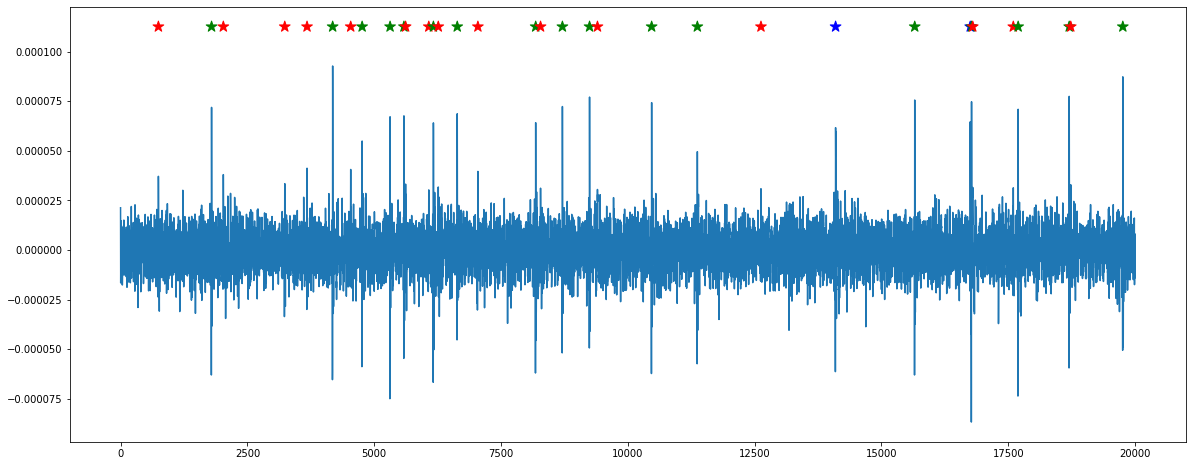

In [18]:
colors = ['r','g','b']
plt.plot(electrode1[:20000])
x = [i for i in elec1_3_5[0] if i<20000]
plt.scatter(x=x, y=[max(electrode1)]*len(x), marker="*", s=128, color=list(map(lambda x: colors[x],elec1_3_5[1]))[:len(x)])
plt.savefig("DetectedSpikes_1_3_5.jpg")

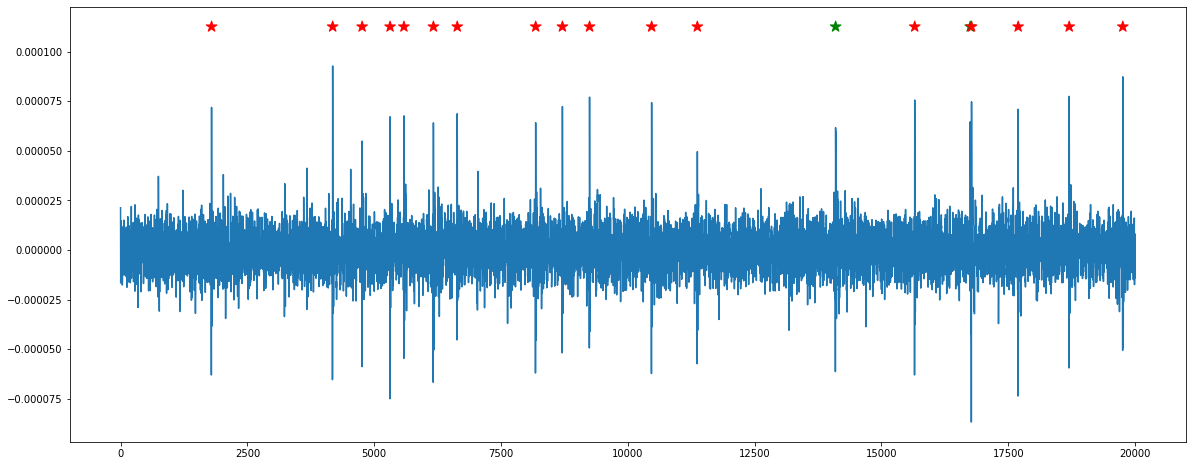

In [19]:
colors = ['r','g','b']
plt.plot(electrode1[:20000])
x = [i for i in elec1_5[0] if i<20000]
plt.scatter(x=x, y=[max(electrode1)]*len(x), marker="*", s=128, color=list(map(lambda x: colors[x],elec1_5[1]))[:len(x)])
plt.savefig("DetectedSpikes_1_5.jpg")

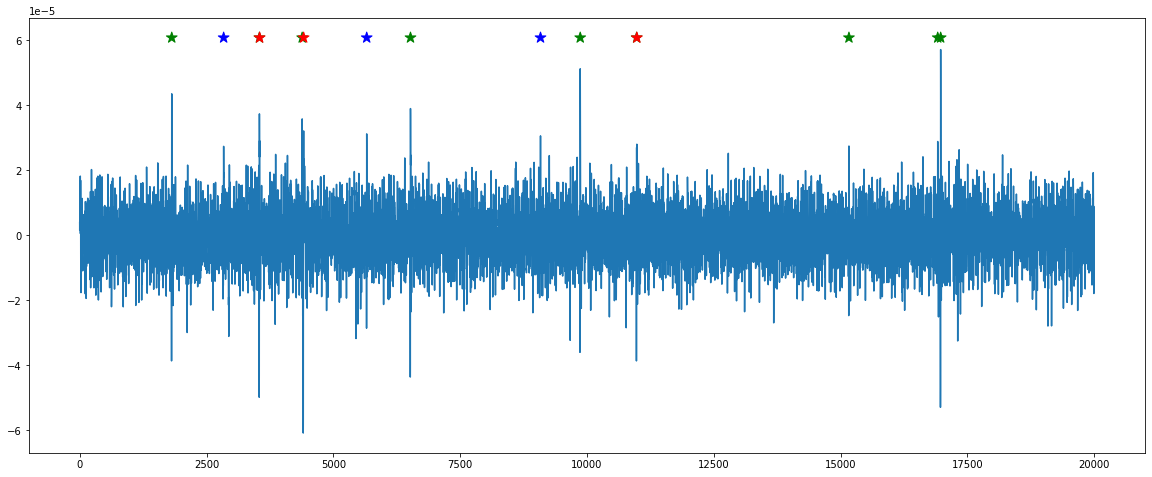

In [20]:
colors = ['r','g','b']
plt.plot(electrode2[:20000])
x = [i for i in elec2_3_5[0] if i<20000]
plt.scatter(x=x, y=[max(electrode2)]*len(x), marker="*", s=128, color=list(map(lambda x: colors[x],elec2_3_5[1]))[:len(x)])
plt.savefig("DetectedSpikes_2_3_5.jpg")

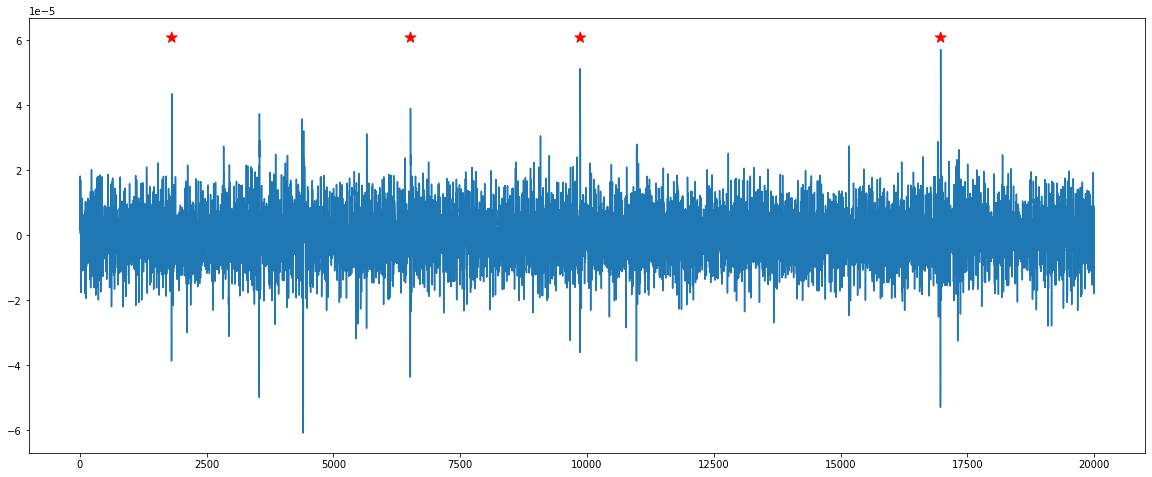

In [21]:
colors = ['r','g','b','o','m','y']
plt.plot(electrode2[:20000])
x = [i for i in elec2_5[0] if i<20000]
plt.scatter(x=x, y=[max(electrode2)]*len(x), marker="*", s=128, color=list(map(lambda x: colors[x],elec2_5[1]))[:len(x)])
plt.savefig("DetectedSpikes_2_5.jpg")

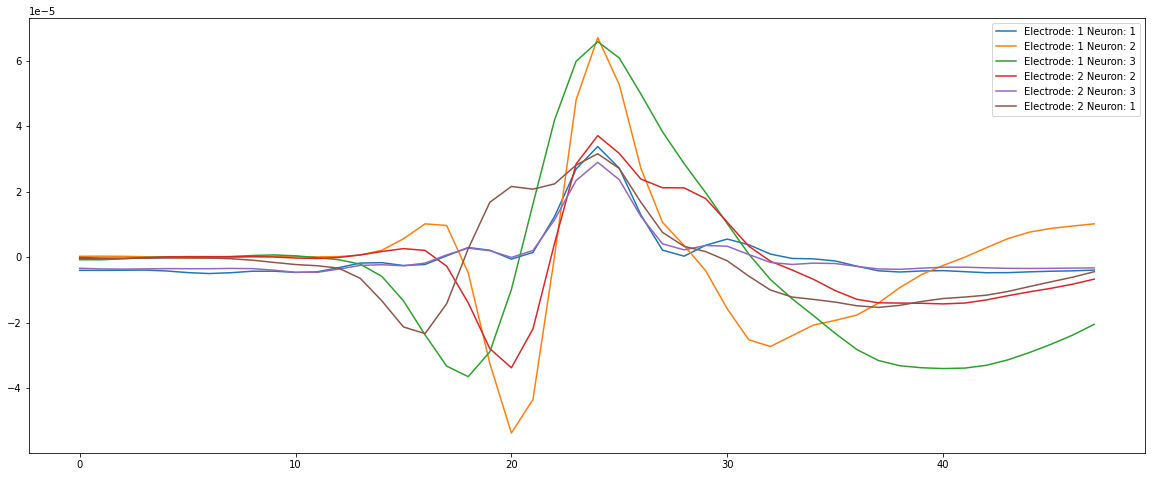

In [31]:
window = 24414*2//1000
neurons1_3_5 = dict()
legend=[]

for i in range(len(elec1_3_5[0])):
    if list(neurons1_3_5.keys()).count(elec1_3_5[1][i]) ==0:
        neurons1_3_5[elec1_3_5[1][i]] = [0]*window
    neurons1_3_5[elec1_3_5[1][i]] += electrode1[elec1_3_5[0][i]-int(window/2):elec1_3_5[0][i]+int(window/2)]
for temp in neurons1_3_5.keys():
    neurons1_3_5[temp] /= list(elec1_3_5[1]).count(temp)
for neuron in neurons1_3_5:
    plt.plot(neurons1_3_5[neuron])
    legend.append("Electrode: 1 Neuron: " + str(neuron+1))


neurons2_3_5 = dict()
for i in range(len(elec2_3_5[0])):
    if list(neurons2_3_5.keys()).count(elec2_3_5[1][i]) ==0:
        neurons2_3_5[elec2_3_5[1][i]] = [0]*window
    neurons2_3_5[elec2_3_5[1][i]] += electrode2[elec2_3_5[0][i]-int(window/2):elec2_3_5[0][i]+int(window/2)]
for temp in neurons2_3_5.keys():
    neurons2_3_5[temp] /= list(elec2_3_5[1]).count(temp)
for neuron in neurons2_3_5:
    plt.plot(neurons2_3_5[neuron])
    legend.append("Electrode: 2 Neuron: " + str(neuron+1))
plt.legend(legend)
plt.savefig("Templates_3_5.jpg")

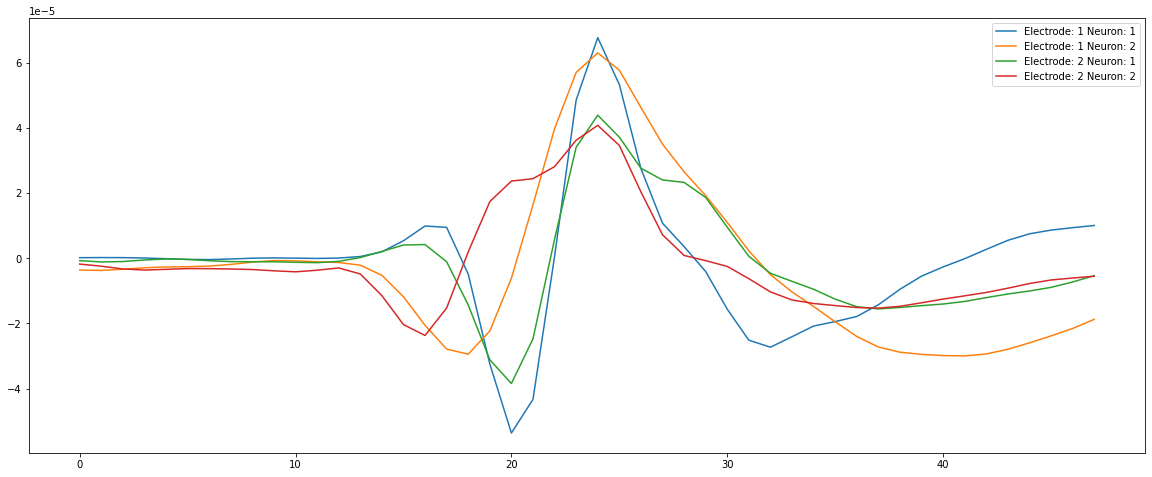

In [29]:
window = 24414*2//1000
neurons1_5 = dict()
legend=[]
for i in range(len(elec1_5[0])):
    if list(neurons1_5.keys()).count(elec1_5[1][i]) ==0:
        neurons1_5[elec1_5[1][i]] = [0]*window
    neurons1_5[elec1_5[1][i]] += electrode1[elec1_5[0][i]-int(window/2):elec1_5[0][i]+int(window/2)]
for temp in neurons1_5.keys():
    neurons1_5[temp] /= list(elec1_5[1]).count(temp)
for neuron in neurons1_5:
    plt.plot(neurons1_5[neuron], label=neuron)
    legend.append("Electrode: 1 Neuron: " + str(neuron+1))

neurons2_5 = dict()
for i in range(len(elec2_5[0])):
    if list(neurons2_5.keys()).count(elec2_5[1][i]) ==0:
        neurons2_5[elec2_5[1][i]] = [0]*window
    neurons2_5[elec2_5[1][i]] += electrode2[elec2_5[0][i]-int(window/2):elec2_5[0][i]+int(window/2)]
for temp in neurons2_5.keys():
    neurons2_5[temp] /= list(elec2_5[1]).count(temp)
for neuron in neurons2_5:
    plt.plot(neurons2_5[neuron])
    legend.append("Electrode: 2 Neuron: " + str(neuron+1))
plt.legend(legend)
plt.savefig("Templates_5.jpg")